In [1]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
style.use('ggplot')

In [3]:
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df= df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_FCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close']*100
df['FCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open']* 100

In [5]:
df = df[['Adj. Close', 'HL_FCT', 'FCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_FCT,FCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [6]:
forecast_col = 'Adj. Close'

In [7]:
df.isnull().sum()
df.fillna(-99999, inplace = True)

In [8]:
forecast_out = int(math.ceil(0.01*len(df)))
#math.ceil rounds up the output to the nearest whole number

In [9]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_FCT,FCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [10]:
df.describe()

,Adj. Close,HL_FCT,FCT_change,Adj. Volume,label
count,3424.000000,3424.000000,3424.000000,3.424000e+03,3389.000000
mean,409.057885,1.064055,-0.025030,7.818568e+06,412.689425
std,257.773495,1.134349,1.505326,8.248211e+06,256.598265
min,50.159839,0.000000,-9.179757,5.211410e+05,67.839414
25%,231.316552,0.335169,-0.742241,2.430647e+06,233.094541
50%,300.264387,0.728061,-0.016254,5.076200e+06,301.425472
75%,561.200000,1.391731,0.752556,1.020910e+07,563.390000
max,1187.560000,11.157480,8.759770,8.215110e+07,1187.560000


In [11]:
X = np.array(df.drop(['label'], axis =1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [12]:
df.dropna(inplace = True)
y = np.array(df['label'])
print(len(X), len(y))

3389 3389


In [13]:
 X_train, X_test, y_train,  y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

In [14]:
reg = LinearRegression(n_jobs = -1)
reg.fit(X_train, y_train)
#to save model in a pickle file
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(reg, f)

In [15]:
#to open pickled file
pickle_in = open('linearregression.pickle', 'rb')
reg = pickle.load(pickle_in)

In [16]:
accuracy = reg.score(X_test, y_test)
accuracy

0.9793864220258133

In [17]:
#using support vector algorithm (SVM)
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy2 = clf.score(X_test, y_test)
accuracy2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7972048348125244

In [18]:
forecast_set = reg.predict(X_lately)
print (forecast_set, accuracy, forecast_out)

[1078.86154271 1093.55353653 1107.60192116 1102.24677963 1095.73923406
 1093.10135103 1091.55571637 1088.52605254 1082.27920283 1077.88997045
 1075.61281043 1094.99061537 1113.41667587 1118.00040574 1132.95287755
 1136.97739598 1135.67398646 1133.16756836 1134.97862011 1153.26531939
 1152.35598033 1162.64734475 1159.18677766 1166.98391189 1187.15558782
 1199.6733982  1193.86488211 1205.94652487 1211.56583522 1209.45137927
 1200.19547873 1205.89485501 1204.43172597 1139.8621823  1086.22828375] 0.9793864220258133 35


In [19]:
df['Forecast'] = np.nan

In [20]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day= 86400
next_unix = last_unix + one_day

In [21]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

Text(0, 0.5, 'Price')

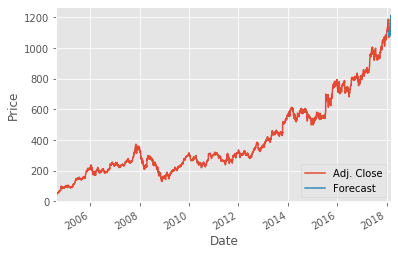

In [22]:
df['Adj. Close'].plot()
df['Forecast']. plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

In [24]:
2^2

0